<a href="https://colab.research.google.com/github/k-chanez/Churn-prediction/blob/meriem/MyNoteBook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Récupération vos données depuis BigQuery dans un DataFrame

In [85]:
!pip install google-cloud-bigquery
# Set the path to your service account key file on the GCE VM
key_path = "/projet-m2-ia-churn-prediction-db53d6498522.json"

# Set the environment variable for authentication
import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = key_path
from google.cloud import bigquery

# Remplacez 'project_id' par l'ID de votre projet GCP
project_id = 'projet-m2-ia-churn-prediction'

# Exécutez une requête BigQuery
query = """
SELECT *
FROM `projet-m2-ia-churn-prediction.Ecommerce_Churn.Ecommerce_Table1`"""
df = bigquery.Client(project=project_id).query(query).to_dataframe()

# Affichez le résultat
print(df)

      CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
0          52720      0    60.0         Mobile Phone         3   
1          50929      0    50.0         Mobile Phone         1   
2          53744      0    51.0         Mobile Phone         1   
3          55535      0    61.0         Mobile Phone         3   
4          51851      0     0.0         Mobile Phone         1   
...          ...    ...     ...                  ...       ...   
5054       53361      0     1.0         Mobile Phone         1   
5055       54286      0     1.0         Mobile Phone         1   
5056       54165      0     1.0         Mobile Phone         1   
5057       53354      1     1.0         Mobile Phone         1   
5058       54824      1     1.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
0                27.0           Debit Card  Female             3.0   
1                 6.0           Debit Card    Male             3.0 

### Exploration des données

In [86]:
# Afficher les premières lignes du DataFrame
print(df.head())

# Infos sur les colonnes et les types de données
print(df.info())

# Statistiques descriptives
print(df.describe())


   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       52720      0    60.0         Mobile Phone         3             27.0   
1       50929      0    50.0         Mobile Phone         1              6.0   
2       53744      0    51.0         Mobile Phone         1              7.0   
3       55535      0    61.0         Mobile Phone         3             28.0   
4       51851      0     0.0         Mobile Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1           Debit Card    Male             3.0                         1   
2           Debit Card    Male             4.0                         2   
3           Debit Card  Female             4.0                         4   
4           Debit Card  Female             3.0                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  Number

### Gestion des valeurs manquantes

In [87]:
print(df.isnull().sum())

CustomerID                       0
Churn                            0
Tenure                           0
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder                0
CashbackAmount                   0
dtype: int64


In [88]:
import pandas as pd

# Afficher le type de chaque colonne
types = df.dtypes

# Liste pour stocker les noms des colonnes catégorielles et numériques
categorical_cols = []
numerical_cols = []

# Boucle sur chaque colonne pour décider si elle est catégorielle ou numérique
for col, dtype in types.items():
    if dtype == 'object' or dtype.name == 'category':
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

# Afficher les colonnes catégorielles et numériques
print("Colonnes catégorielles :", categorical_cols)
print("Colonnes numériques :", numerical_cols)

# Imputation des valeurs manquantes par la moyenne pour les variables numériques
for col in numerical_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].mean(), inplace=True)

# Imputation des valeurs manquantes par le mode pour les variables catégorielles
for col in categorical_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].mode()[0], inplace=True)



Colonnes catégorielles : ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
Colonnes numériques : ['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


In [89]:
print(df.isnull().sum())

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


### Analyse exploratoire des données (EDA)

Histogrammes pour les variables numériques

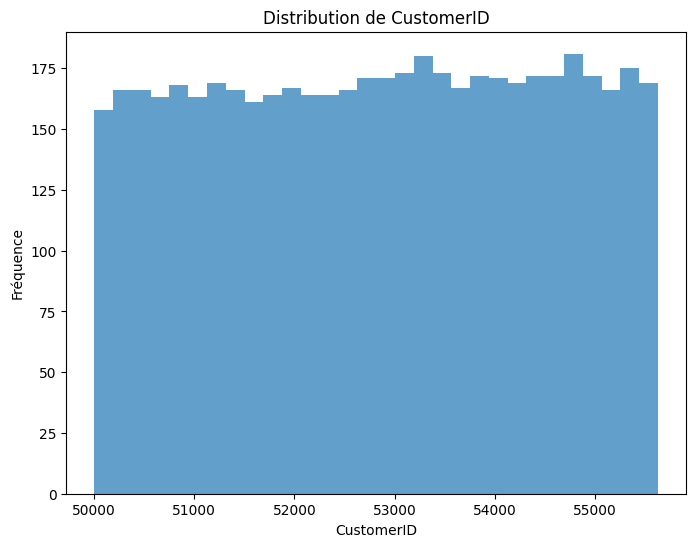

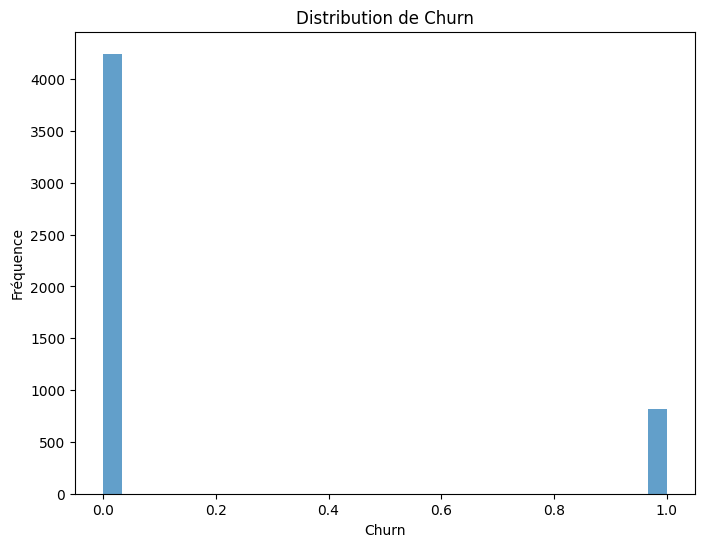

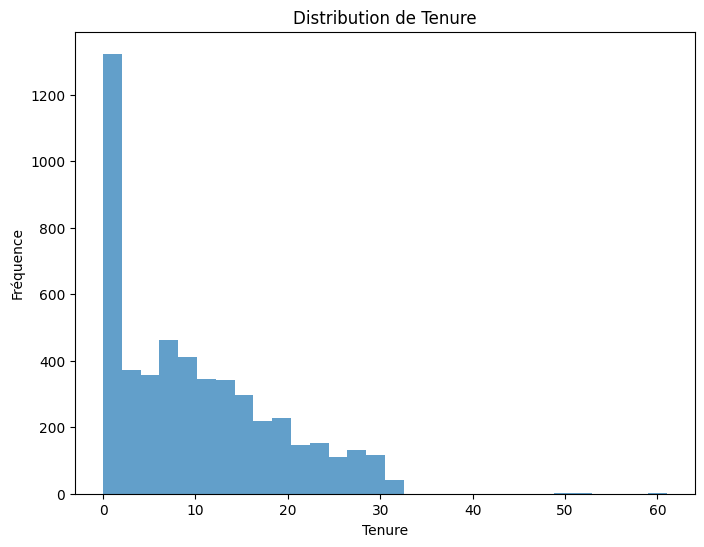

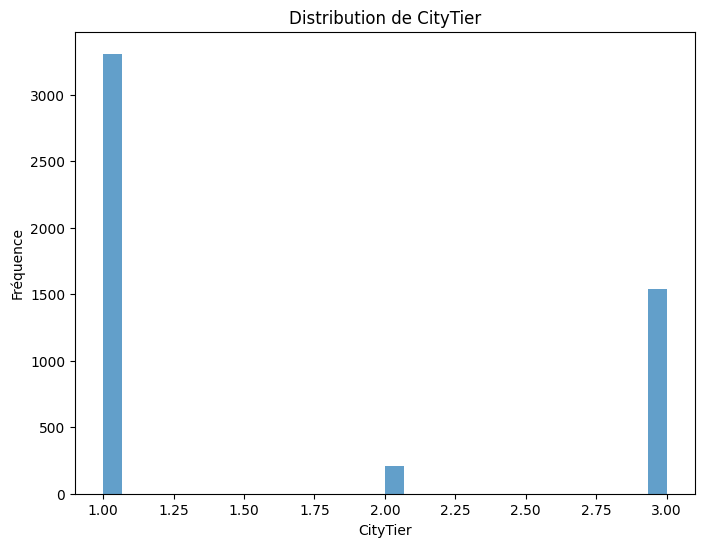

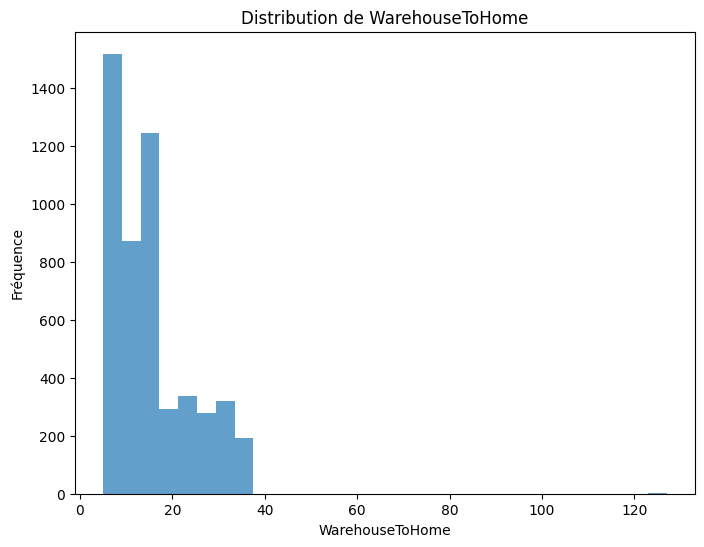

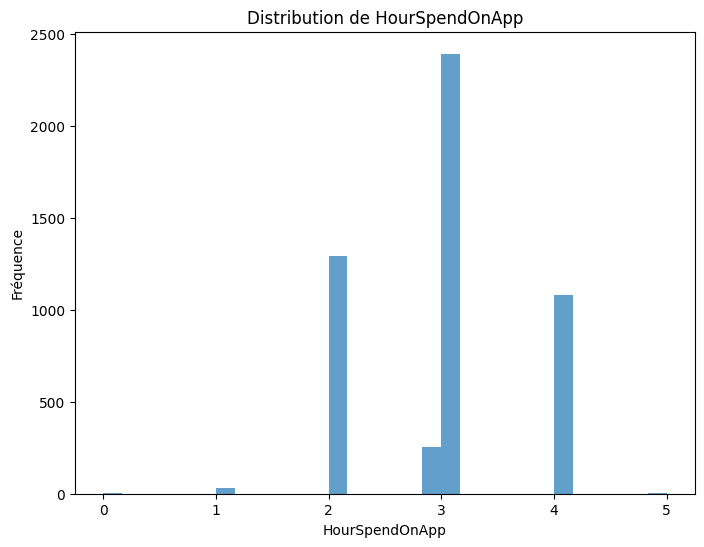

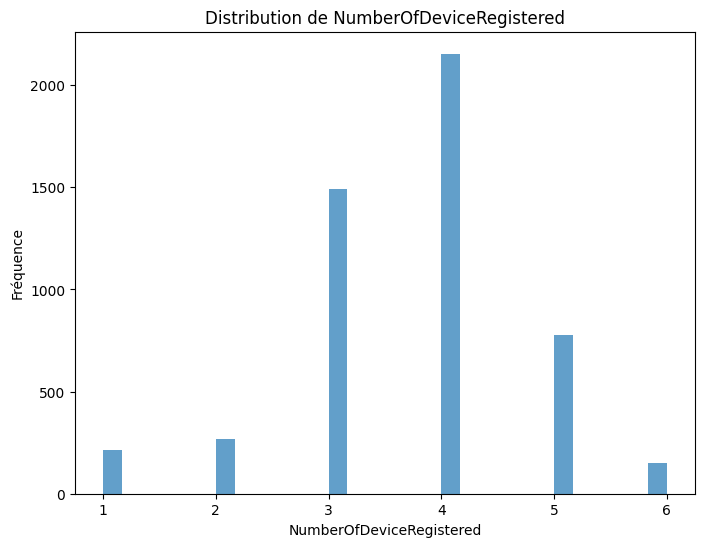

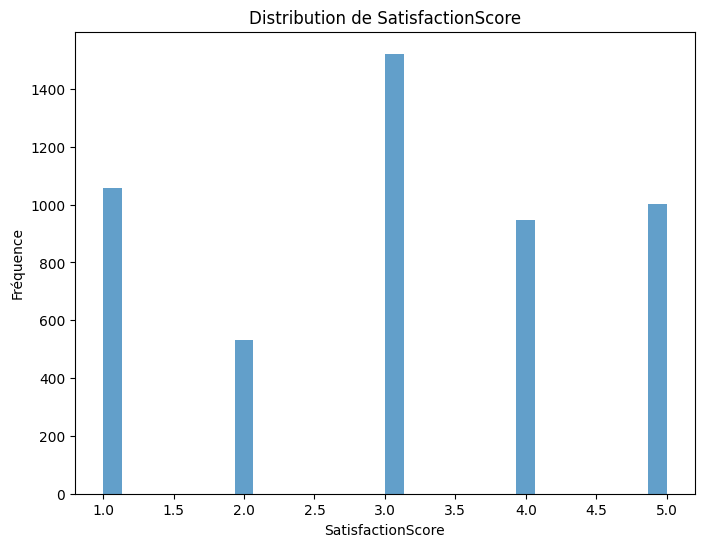

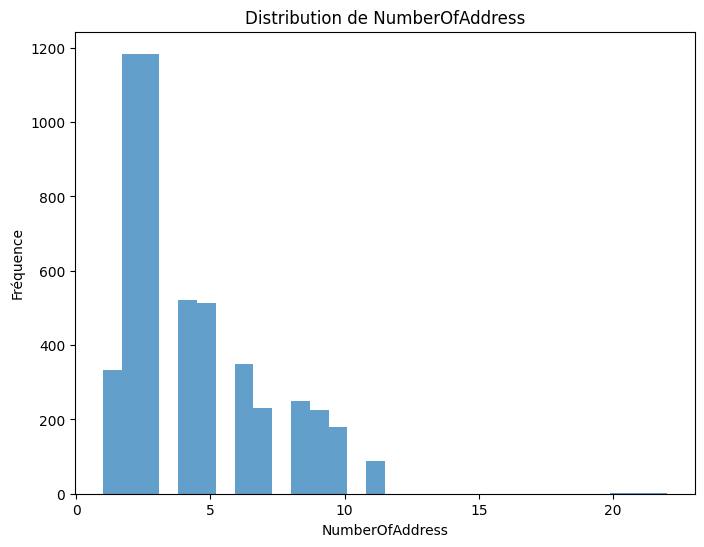

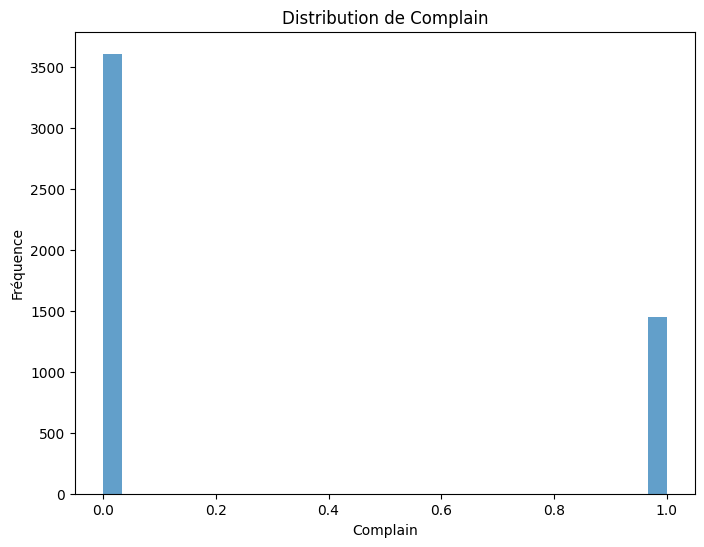

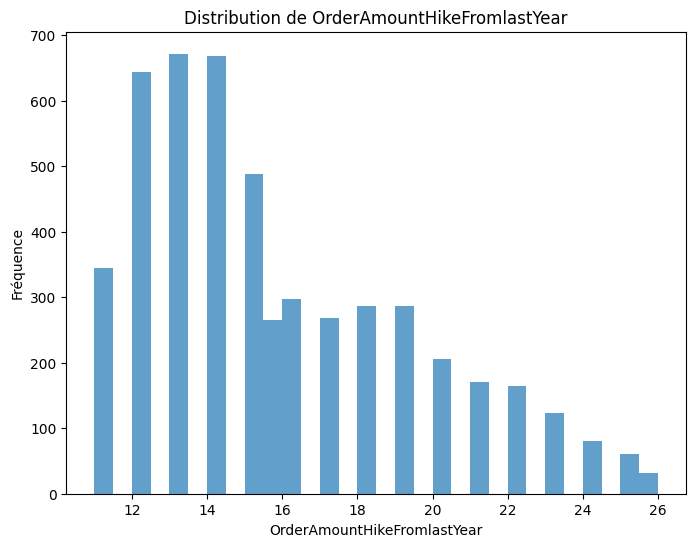

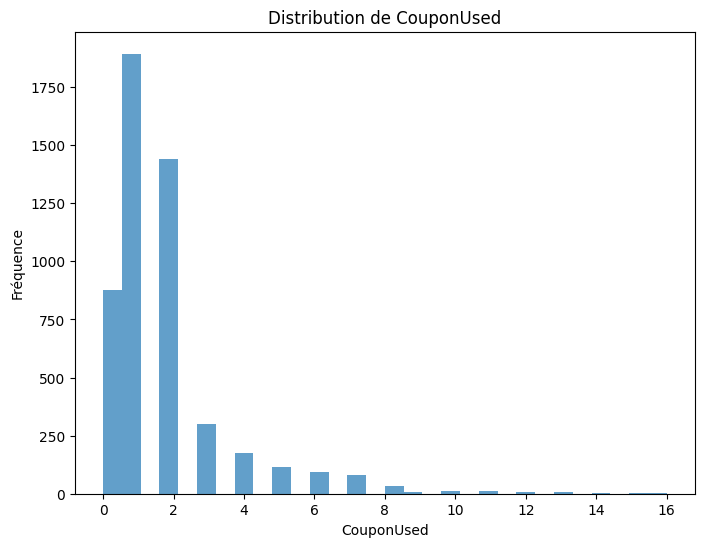

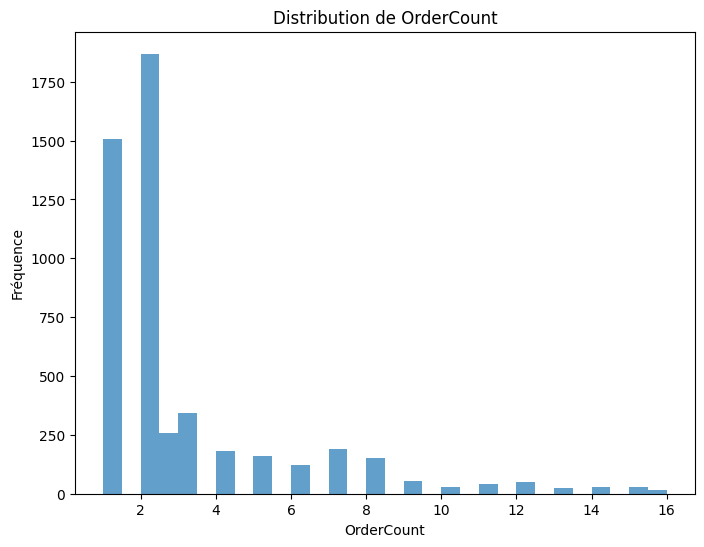

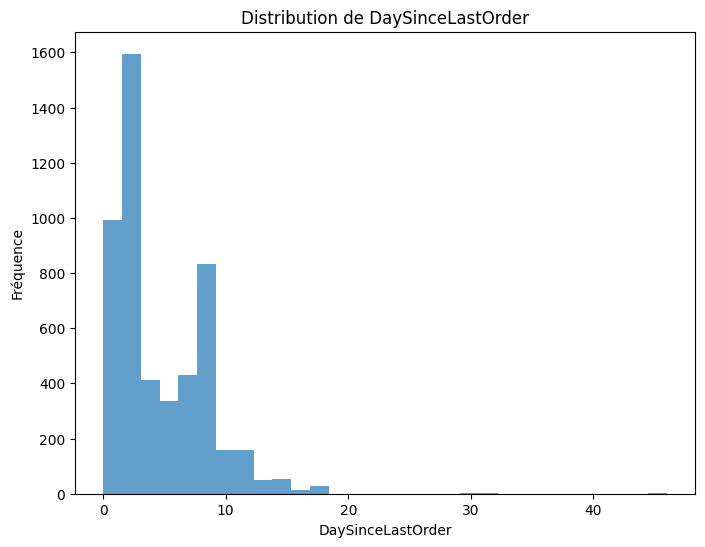

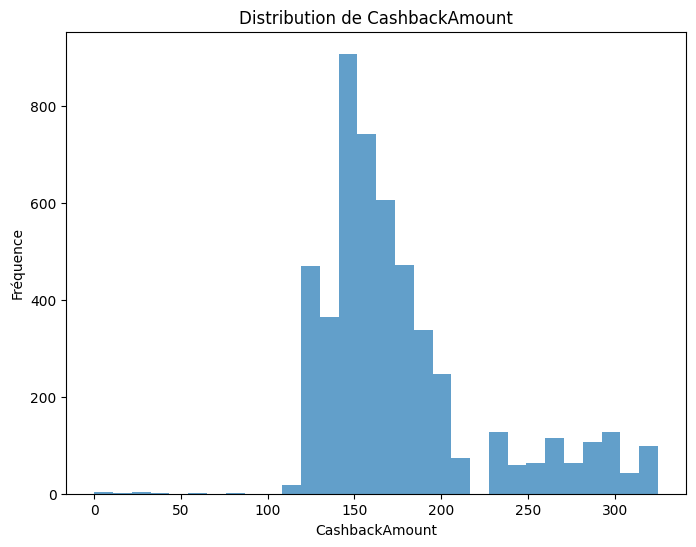

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=30, alpha=0.7)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.show()


Diagrammes en barres pour les variables catégorielles

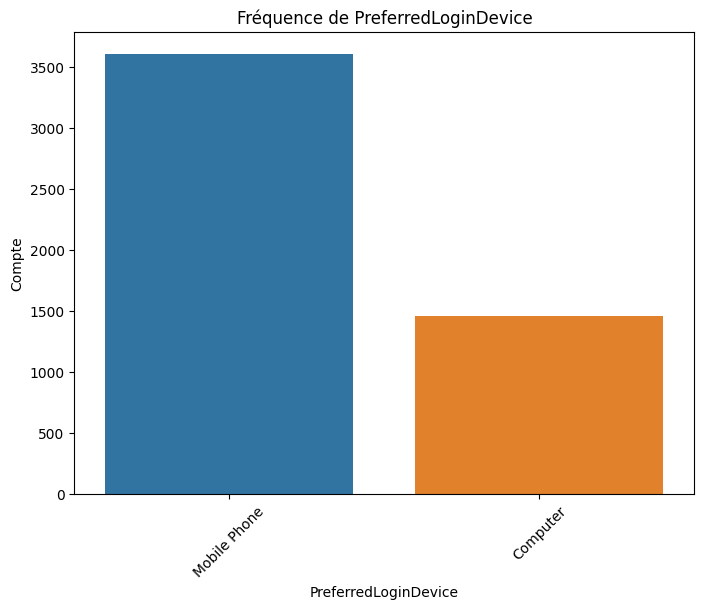

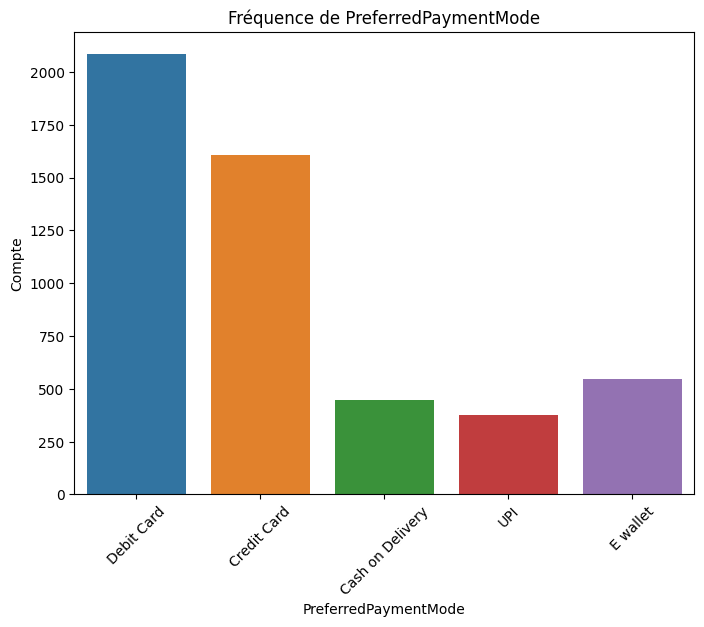

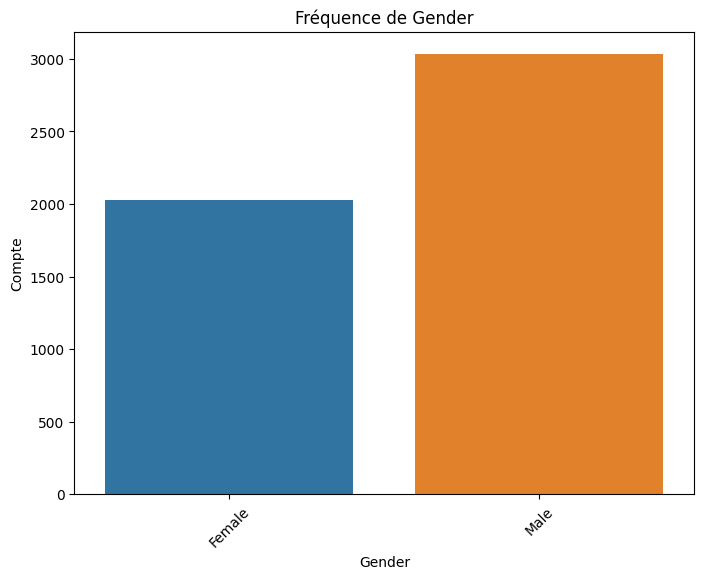

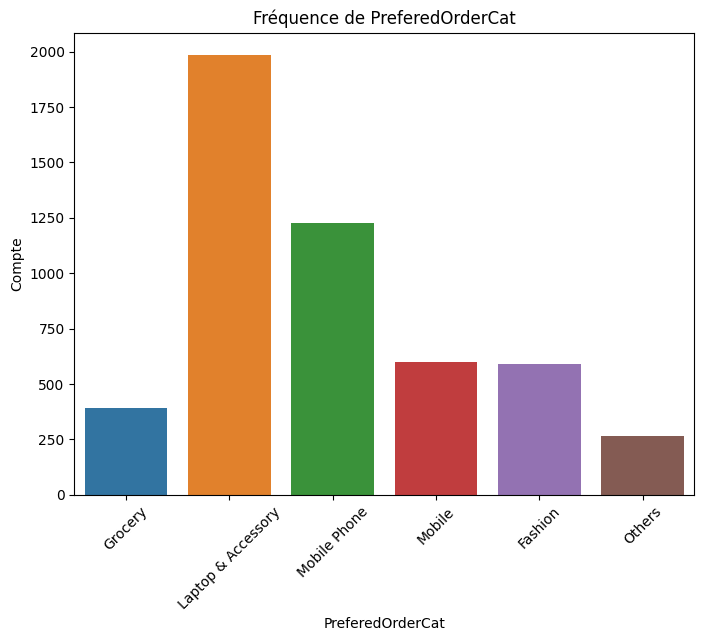

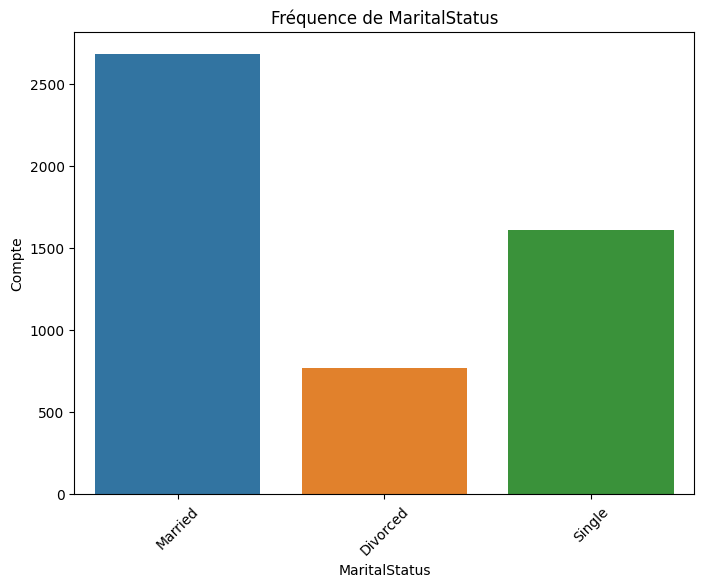

In [91]:
categorical_cols = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Fréquence de {col}')
    plt.xlabel(col)
    plt.ylabel('Compte')
    plt.xticks(rotation=45)
    plt.show()


Matrice de corrélation pour les variables numériques

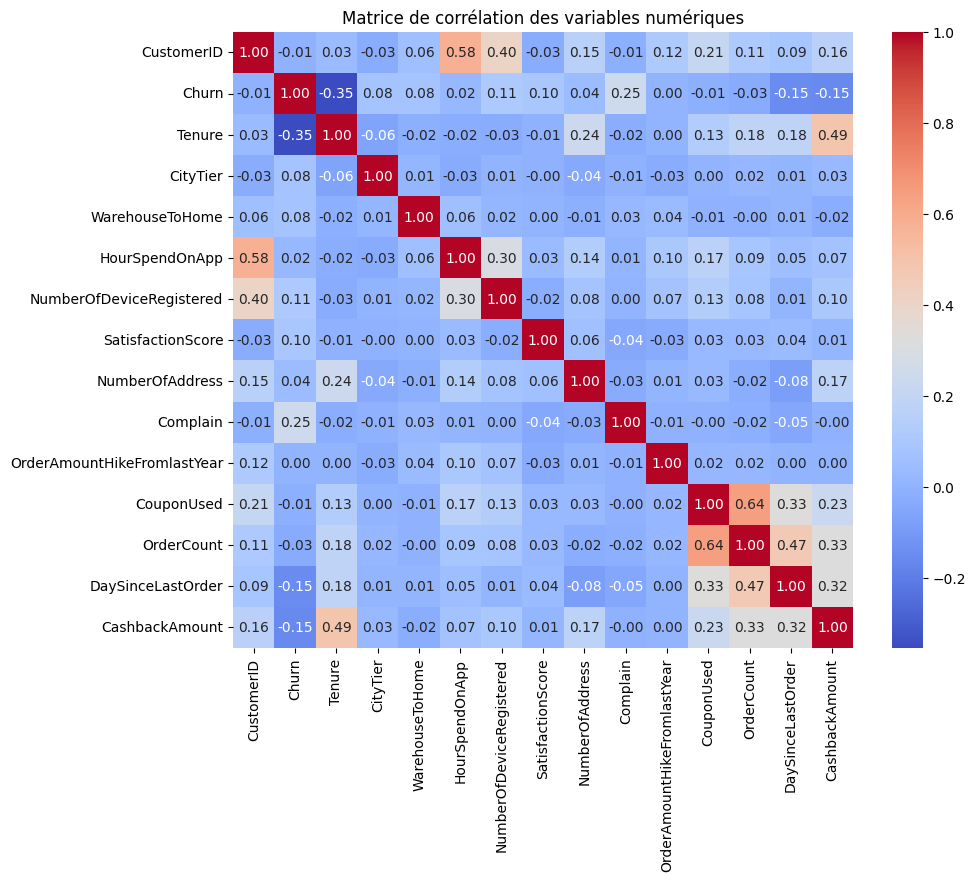

In [92]:
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation des variables numériques')
plt.show()

Ingénierie des fonctionnalités (Feature Engineering)

In [93]:
#Ratio entre les variables
df['OrderAmountToCouponUsedRatio'] = df['OrderAmountHikeFromlastYear'] / df['CouponUsed']

#Création de fonctions d'agrégation
avg_order_amount_by_satisfaction = df.groupby('SatisfactionScore')['OrderAmountHikeFromlastYear'].mean()
# Ajoutez cette information au DataFrame principal
df = df.merge(avg_order_amount_by_satisfaction, on='SatisfactionScore', how='left')
df.rename(columns={'OrderAmountHikeFromlastYear_y': 'AvgOrderAmountBySatisfaction'}, inplace=True)

#Création de variables binaires
df = pd.get_dummies(df, columns=['CityTier'], prefix='City')

#Interaction entre les variables
df['Interaction_Tenure_Satisfaction'] = df['Tenure'] * df['SatisfactionScore']


In [94]:
df = pd.get_dummies(df, columns=categorical_cols)
# Supposons que vous avez toutes les colonnes sauf 'Churn' comme caractéristiques
features = df.drop('Churn', axis=1)

# La colonne 'Churn' est votre variable cible
target = df['Churn']

# Maintenant X représente vos caractéristiques et y représente la variable cible 'Churn'
X = features
y = target


Normalisation des données et gestion des données extremes:

In [105]:

import numpy as np

# Remplacement des valeurs infinies par la moyenne de la colonne
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)


<ipython-input-105-188f23cb9557>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.fillna(X.mean(), inplace=True)


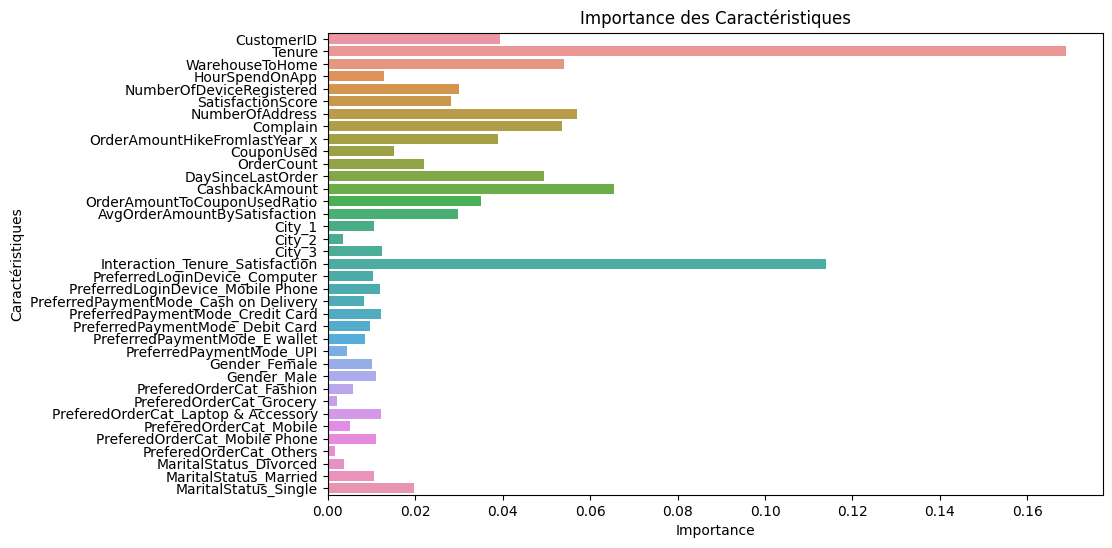

In [106]:
from sklearn.ensemble import RandomForestClassifier

# Supposons que vous avez déjà scindé vos données en X (caractéristiques) et y (cible)
model = RandomForestClassifier()
model.fit(X, y)

feature_importances = model.feature_importances_
feature_names = X.columns

# Visualisation de l'importance des caractéristiques
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title('Importance des Caractéristiques')
plt.xlabel('Importance')
plt.ylabel('Caractéristiques')
plt.show()


### Modélisation

RandomForestClassifier


In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Supposons que vous avez déjà scindé vos données en X (caractéristiques) et y (cible)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation du modèle RandomForestClassifier
model = RandomForestClassifier()

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
predictions = model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, predictions)
print(f"Précision du modèle : {accuracy}")

# Autres métriques d'évaluation
print(classification_report(y_test, predictions))


Précision du modèle : 0.958498023715415
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       834
         1.0       0.97      0.79      0.87       178

    accuracy                           0.96      1012
   macro avg       0.96      0.89      0.92      1012
weighted avg       0.96      0.96      0.96      1012



DecicionTreeClassifier

In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Supposons que vous avez déjà scindé vos données en X (caractéristiques) et y (cible)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation du modèle DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

# Entraînement du modèle
decision_tree.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
predictions_dt = decision_tree.predict(X_test)

# Évaluation du modèle
accuracy_dt = accuracy_score(y_test, predictions_dt)
print(f"Précision du modèle Arbre de Décision : {accuracy_dt}")

# Autres métriques d'évaluation
print(classification_report(y_test, predictions_dt))


Précision du modèle Arbre de Décision : 0.9496047430830039
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       834
         1.0       0.85      0.87      0.86       178

    accuracy                           0.95      1012
   macro avg       0.91      0.92      0.91      1012
weighted avg       0.95      0.95      0.95      1012



AdaBoostClassifier

In [109]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Supposons que vous avez déjà scindé vos données en X (caractéristiques) et y (cible)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation du modèle AdaBoostClassifier
adaboost = AdaBoostClassifier()

# Entraînement du modèle
adaboost.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
predictions_ab = adaboost.predict(X_test)

# Évaluation du modèle
accuracy_ab = accuracy_score(y_test, predictions_ab)
print(f"Précision du modèle AdaBoost : {accuracy_ab}")

# Autres métriques d'évaluation
print(classification_report(y_test, predictions_ab))


Précision du modèle AdaBoost : 0.8932806324110671
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94       834
         1.0       0.76      0.57      0.65       178

    accuracy                           0.89      1012
   macro avg       0.84      0.77      0.80      1012
weighted avg       0.89      0.89      0.89      1012

